# Hypothesis 4

1. Rename this notebook to correct name `3-Name_Surname.ipynb`
2. Select your best classification model and fit it on `ALL` features, and fill table 
3. Apply one or several feature selection method and remove unimportant features for classification model
    - coef / feature importance, random feature, permutation importance, rfe, shap
    - fit the same algorithm on `selected` features only and fill table with new metrics
    - the quality on selected features should be approximatelyequal to on ALL features 
4. Select your best regression model and fit it on `ALL` features, and fill table
5. Apply one or several feature selection method and remove unimportant features for regression model
    - coef / feature importance, random feature, permutation importance, rfe, shap
    - fit the same algorithm on `selected` features only and fill table with new metrics
    - the quality on selected features should be approximately equal to on ALL features
    - it's okay. selected features for `regression model` may not be equal selected features for `classification model`
5. Fill table below with metrics and number of features (Please hold this table in the top of notebook)
6. Prepare submission file with two model on selected features only and send submission csv file to me

Notes:
- You can get up to 1 point
- Deadline 11 May 23.59

In [1]:
import numpy as np
import pandas as pd

scoring = pd.DataFrame([
    ('Random Forest Regressor', '86', '0.1401', '30', '0.1410'),
    ('Gradient Boosting Classifier', '86', '0.9644', '25', '0.9642'),
], columns=['algorithm', 'number of original features', 'test metric on original features', 
            'number of selected features', 'test metric on selected features'])

scoring.T

,0,1
algorithm,Random Forest Regressor,Gradient Boosting Classifier
number of original features,86,86
test metric on original features,0.1401,0.9644
number of selected features,30,25
test metric on selected features,0.1410,0.9642


In [57]:
def alg1(x):
    """
    Algorithm version 1
    """
    return x['__price_predict']


# please fit on selected features only - clf_selected_features (not at all)
clf_model = GradientBoostingClassifier(n_estimators=100, max_depth=5,learning_rate=0.05)
clf_model.fit(train[clf_selected_features], train['__churn'])
submission['__churn_prob'] = clf_model.predict_proba(submission[clf_selected_features])[:, 1]

# please fit on selected features only - reg_selected_features (not at all)
reg_model = RandomForestRegressor(max_depth=50, random_state=73, criterion="squared_error")
reg_model.fit(train[reg_selected_features], train['__price_doc'])
submission['__price_predict'] = reg_model.predict(submission[reg_selected_features])

submission['__priority'] = submission.apply(alg1, axis=1)

# select only 3 features
final_score = submission[['__price_predict', '__churn_prob', '__priority']]
print(final_score.columns.tolist())
print(final_score.shape)
assert final_score.shape == (9988, 3)
assert final_score.columns.tolist() == ['__price_predict', '__churn_prob', '__priority']
final_score.to_csv('4-Mariia_Dmitrieva.csv', index=False)
final_score.head()

['__price_predict', '__churn_prob', '__priority']
(9988, 3)


,__price_predict,__churn_prob,__priority
0,8.006816,0.948434,8.006816
1,4.474449,0.004284,4.474449
2,4.973490,0.010350,4.973490
3,4.463695,0.003740,4.463695
4,15.431731,0.004017,15.431731


# Your code starts here

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline


pd.set_option('mode.chained_assignment', None)
pd.options.display.max_rows = 100

train_raw = pd.read_csv('train_corr.csv')
submission = pd.read_csv('test_corr.csv')

## Split data

In [3]:
final_features = [c for c in train_raw.columns if c.startswith('f_')]
tmp = (train_raw[final_features].dtypes != 'object')
final_features = tmp[tmp == True].index.tolist()
final_features

['f__max_floor',
 'f__state',
 'f__total_revolving_bal',
 'f__market_count_1500',
 'f__leisure_count_3000',
 'f__total_ct_chng_q4_q1',
 'f__railroad_station_walk_km',
 'f__contacts_count_12_mon',
 'f__0_17_all',
 'f__trc_count_2000',
 'f__build_count_wood',
 'f__credit_limit',
 'f__total_trans_ct',
 'f__leisure_count_5000',
 'f__life_sq',
 'f__cafe_count_1000_price_1000',
 'f__mkad_km',
 'f__school_education_centers_top_20_raion',
 'f__avg_utilization_ratio',
 'f__public_transport_station_min_walk',
 'f__customer_age',
 'f__detention_facility_km',
 'f__sport_count_2000',
 'f__cafe_sum_1000_min_price_avg',
 'f__total_amt_chng_q4_q1',
 'f__metro_km_walk',
 'f__office_sqm_5000',
 'f__total_trans_amt',
 'f__months_inactive_12_mon',
 'f__cafe_sum_1500_min_price_avg',
 'f__floor',
 'f__num_room',
 'f__months_on_book',
 'f__dependent_count',
 'f__avg_open_to_buy',
 'f__build_year',
 'f__full_sq',
 'f__total_relationship_count',
 'f__build_count_mix',
 'f__marital_status_Married',
 'f__marital

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

RANDOM_STATE = 47

train, test = train_test_split(train_raw, test_size=0.5, random_state=RANDOM_STATE)
train.shape, test.shape, submission.shape

((6976, 147), (6977, 147), (9988, 145))

In [5]:
X_train = train[final_features].fillna(0).copy(True)
X_test = test[final_features].fillna(0).copy(True)
X_sub = submission[final_features].fillna(0).copy(True)

# list in which we store a set of different datasets for training and evaluating the model
# (dataset name, training set of features, deferred set of features)
# the training dataset should come first
X_y_datasets = [
    ('train', X_train, train),
    ('test', X_test, test),
    ('submission', X_sub, submission)]

X_train.shape, X_test.shape, X_sub.shape

((6976, 86), (6977, 86), (9988, 86))

## Interpretability in Machine Learning

## Feature importance

### Feature importances (for trees, RF or Gradient Boosting models)

In [6]:
#for regression

In [6]:
from sklearn.metrics import mean_squared_log_error

In [7]:
from sklearn.ensemble import RandomForestRegressor

reg_model = RandomForestRegressor(max_depth=50, random_state=73, criterion="squared_error")
reg_model.fit(X_train, train['__price_doc'])

KeyboardInterrupt: 

In [ ]:
mean_squared_log_error(y_true=test['__price_doc'], y_pred=reg_model.predict(X_test))

In [ ]:
reg_imp = (
    pd.Series(reg_model.feature_importances_, index=X_train.columns)
    .to_frame(name='imp')
    .round(4)
)
# reg_imp['abs'] = reg_imp['imp'].abs()
reg_imp.sort_values('imp', ascending=False, inplace=True)
# reg_imp.drop(['abs'], inplace=True, axis=1)

reg_imp

<AxesSubplot:>

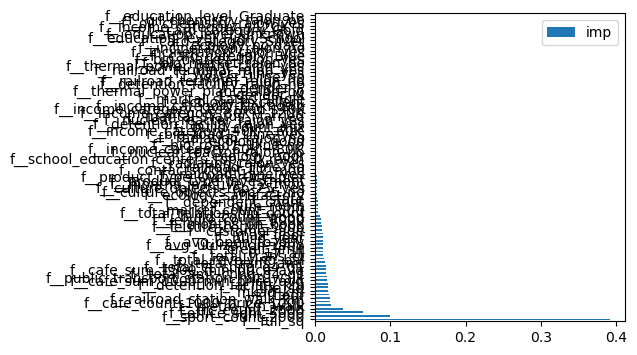

In [12]:
reg_imp.plot(kind='barh', figsize=(4, 4))

In [33]:
top_n_reg=30

In [34]:
reg_model2 = RandomForestRegressor(max_depth=50, random_state=73, criterion="squared_error")
reg_model2.fit(X_train[list(reg_imp.head(top_n_reg).index)], train['__price_doc'])

RandomForestRegressor(max_depth=50, random_state=73)

In [35]:
mean_squared_log_error(y_true=test['__price_doc'], y_pred=reg_model2.predict(X_test[list(reg_imp.head(top_n_reg).index)]))

0.14106173108432243

In [36]:
#for classification

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
class_model = GradientBoostingClassifier(n_estimators=100, max_depth=5,learning_rate=0.05)
class_model.fit(X_train, train['__churn'])

GradientBoostingClassifier(learning_rate=0.05, max_depth=5)

In [42]:
reg_imp_class = (
    pd.Series(class_model.feature_importances_, index=X_train.columns)
    .to_frame(name='imp')
    .round(4)
)
# reg_imp['abs'] = reg_imp['imp'].abs()
reg_imp_class.sort_values('imp', ascending=False, inplace=True)
# reg_imp.drop(['abs'], inplace=True, axis=1)

reg_imp_class

,imp
f__contacts_count_12_mon,0.4217
f__total_ct_chng_q4_q1,0.1740
f__total_trans_ct,0.0690
f__total_relationship_count,0.0668
f__total_trans_amt,0.0511
f__total_revolving_bal,0.0374
f__months_inactive_12_mon,0.0277
f__total_amt_chng_q4_q1,0.0153
f__avg_utilization_ratio,0.0138
f__credit_limit,0.0127


In [43]:
from sklearn.metrics import roc_auc_score

In [44]:
roc_auc_score(test['__churn'],class_model.predict_proba(X_test)[:,1])

0.9644412347359965

In [49]:
top_n_class=25

In [50]:
class_model2 = GradientBoostingClassifier(n_estimators=100, max_depth=5,learning_rate=0.05)
class_model2.fit(X_train[list(reg_imp_class.head(top_n_class).index)], train['__churn'])

GradientBoostingClassifier(learning_rate=0.05, max_depth=5)

In [51]:
roc_auc_score(test['__churn'],class_model2.predict_proba(X_test[list(reg_imp_class.head(top_n_class).index)])[:,1])

0.9641915367961384

In [53]:
clf_selected_features=list(reg_imp_class.head(top_n_class).index)
reg_selected_features=list(reg_imp.head(top_n_reg).index)